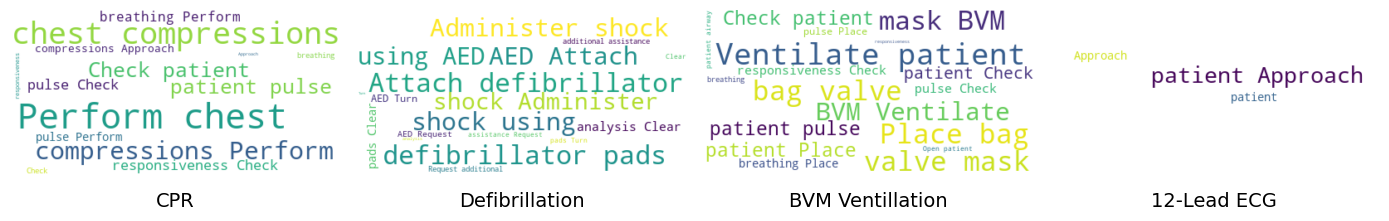

In [13]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the JSON file
with open('../../Annotations/main_annotation_classification.json') as f:
    data = json.load(f)

# Define the label categories and descriptions
categories = {
    'CPR': [
        'approach_patient', 'check_responsiveness', 'check_pulse', 
        'check_breathing', 'chest_compressions'
    ],
    'Defibrillation': [
        'request_aed', 'request_assistance', 'turn_on_aed', 
        'attach_defib_pads', 'clear_for_analysis', 'clear_for_shock', 
        'administer_shock_aed'
    ],
    'BVM Ventillation': [
        'check_responsiveness', 'check_pulse', 'check_breathing', 
        'open_airway', 'place_bvm', 'ventilate_patient'
    ],
    '12-Lead ECG': [
        'approach_patient', 'assess_patient', 'explain_procedure', 
        'shave_patient', 'place_left_arm_lead', 'place_right_arm_lead', 
        'place_left_leg_lead', 'place_right_leg_lead', 'place_v1_lead', 
        'place_v2_lead', 'place_v4_lead', 'place_v3_lead', 'place_v5_lead', 
        'place_v6_lead', 'ask_patient_age_sex', 'request_patient_to_not_move', 
        'turn_on_ecg', 'connect_leads_to_ecg', 'obtain_ecg_recording', 
        'interpret_and_report'
    ]
}

descriptions = {
    "approach_patient": "Approach the patient",
    "check_responsiveness": "Check for responsiveness",
    "check_pulse": "Check patient's pulse",
    "check_breathing": "Check if patient is breathing",
    "chest_compressions": "Perform chest compressions",
    "request_aed": "Request an AED",
    "request_assistance": "Request additional assistance",
    "turn_on_aed": "Turn on the AED",
    "attach_defib_pads": "Attach defibrillator pads",
    "clear_for_analysis": "Clear for analysis",
    "clear_for_shock": "Clear for shock",
    "administer_shock_aed": "Administer shock using AED",
    "open_airway": "Open patient's airway",
    "place_bvm": "Place bag valve mask (BVM)",
    "ventilate_patient": "Ventilate patient",
    "no_action": "No action",
    "assess_patient": "Assess the patient",
    "explain_procedure": "Explain the ECG procedure to the patient",
    "shave_patient": "Shave/Cleanse the patient for ECG",
    "place_left_arm_lead": "Place the lead on left arm for ECG",
    "place_right_arm_lead": "Place the lead on right arm for ECG",
    "place_left_leg_lead": "Place the lead on left leg for ECG",
    "place_right_leg_lead": "Place the lead on right leg for ECG",
    "place_v1_lead": "Place the V1 lead on the patient",
    "place_v2_lead": "Place the V2 lead on the patient",
    "place_v3_lead": "Place the V3 lead on the patient",
    "place_v4_lead": "Place the V4 lead on the patient",
    "place_v5_lead": "Place the V5 lead on the patient",
    "place_v6_lead": "Place the V6 lead on the patient",
    "ask_patient_age_sex": "Ask the age and or sex of the patient",
    "request_patient_to_not_move": "Request the patient to not move",
    "turn_on_ecg": "Turn on the ECG machine",
    "connect_leads_to_ecg": "Verify all ECG leads are properly connected",
    "obtain_ecg_recording": "Obtain the ECG recording",
    "interpret_and_report": "Interpret the ECG and report findings"
}

# Extract all keystep labels
keystep_labels = []
for subject in data['subjects']:
    for trial in subject['trials']:
        for keystep in trial['keysteps']:
            keystep_labels.append(keystep['label'])

# Organize keystep labels by category
category_texts = {category: [] for category in categories}
for label in keystep_labels:
    for category, keywords in categories.items():
        if label in keywords:
            # Map label to natural language description
            category_texts[category].append(descriptions.get(label, label))

# Define colormaps for each category
colormaps = ['Blues', 'Greens', 'Oranges', 'Purples']


# Generate and display word clouds for each category
fig, axes = plt.subplots(1,4, figsize=(14, 10))  # Adjust based on number of categories
axes = axes.flatten()
for idx, (category, texts) in enumerate(category_texts.items()):
    text = " ".join(texts)
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].text(0.5, -0.1, category, ha='center', va='top', transform=axes[idx].transAxes, fontsize=14)
    axes[idx].axis('off')

# save the figure
plt.savefig('./output/wordclouds.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


